<a href="https://colab.research.google.com/github/Rashii00/AICS/blob/main/AICSprac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from numpy import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/50_Startups.csv')

In [7]:
len(data)

50

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data.shape

(50, 5)

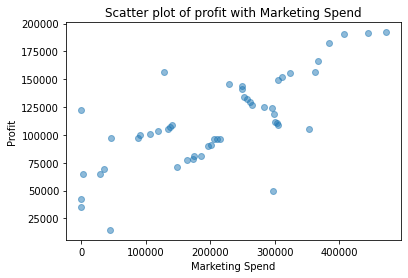

In [11]:
plt.scatter(data['Marketing Spend'], data['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel("Profit")
plt.show()

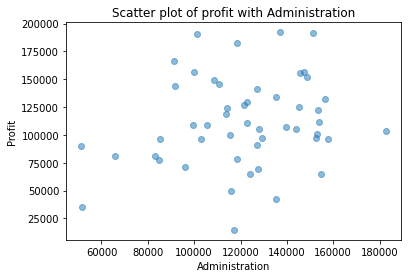

In [12]:
plt.scatter(data['Administration'], data['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel("Profit")
plt.show()

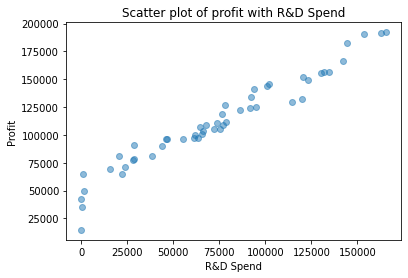

In [13]:
plt.scatter(data['R&D Spend'], data['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.show()

Text(0, 0.5, 'Profit')

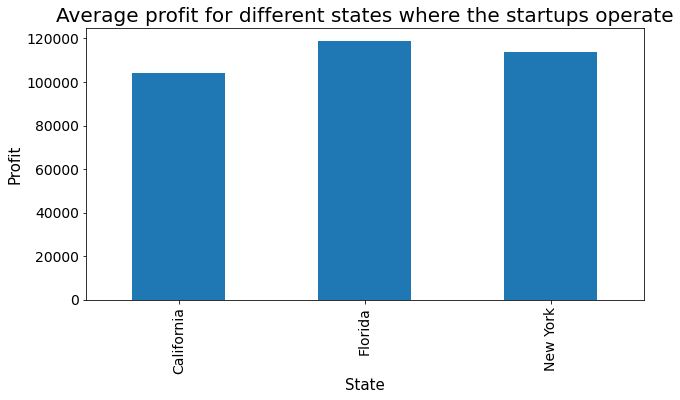

In [15]:
#create the figure object 
ax = data.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Set the title 
ax.set_title("Average profit for different states where the startups operate" , fontsize = 20)

#Set x and y labels
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Profit", fontsize=15)

In [17]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [24]:
#Create dummy variables for the categeorical variable state
data['NewYork_State'] = np.where(data['State']=='New York' , 1,0)
data['California_State'] = np.where(data['State']=='California' , 1,0)
data['Florida_State'] = np.where(data['State']=='Florida' , 1,0)

#Drop the original column state from the data
data.drop(columns=['State'],axis=1,inplace=True)

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [26]:
dependent_variable = 'Profit'

In [27]:
#create a list of independent variables
independent_variables = data.columns.tolist()

In [30]:
independent_variables.remove(dependent_variable)

In [31]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [34]:
x = data[independent_variables].values #Create data of independent variables
y = data[dependent_variable].values #create the dependent variable data

In [41]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
#transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [44]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [45]:
#fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [46]:
#predicting the test set results
y_pred = regressor.predict(x_test)

In [47]:
math.sqrt(mean_squared_error(y_test, y_pred))

15023.010725678325

In [48]:
r2_score(y_test, y_pred)

0.8235262062096438